In [1]:
from scipy.stats import kstest

In [2]:
dat = pd.read_csv("../final_crossovers/Crossovers.all.below20kb.bed",sep="\t",header=None)
dat.columns = ["scaf", "start", "end", "parent"]

In [3]:
genome = pd.read_csv("../misc_files/corn.genome",sep="\t",header=None)
genome.columns = ["scaf", "l"]
gdict = genome.set_index("scaf")["l"].to_dict()

In [4]:
dat["edge"] = dat["scaf"].map(gdict)
dat["ldist"] = dat.start
dat["rdist"] = (dat.edge - dat.end)

In [5]:
dat["dist2edge"] = dat[["ldist","rdist"]].min(axis=1)

In [6]:
dat["rel_dist2edge"] = dat.dist2edge / dat.edge #[d if d<=0.5 else 1-d for d in ]

116


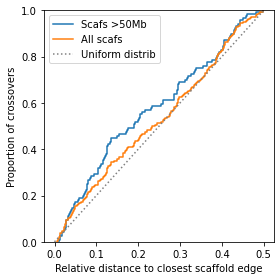

In [8]:
subd = dat[(dat.edge>50e6)]

print(len(subd))

#statistic, p_value = kstest(subd.rel_dist2edge, 'uniform')

#print(f"Statistic: {statistic}")
#print(f"P-value: {p_value}")

f,ax = plt.subplots(figsize=[4,4])

subd = dat[(dat.edge>50e6)]
sns.ecdfplot(data=subd, x="rel_dist2edge",ax=ax, label="Scafs >50Mb")

subd = dat
sns.ecdfplot(data=subd, x="rel_dist2edge",ax=ax, label="All scafs")

ax.axline((0,0), slope=2, linestyle="dotted", color="gray", label="Uniform distrib")

ax.legend()
ax.set_xlabel("Relative distance to closest scaffold edge")
ax.set_ylabel("Proportion of crossovers")
plt.tight_layout()
#plt.savefig("pdfs/distance2edges.pdf")